In [0]:
import tensorflow as tf
from six.moves import cPickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
train_imgs=mnist.train.images
train_labels=mnist.train.labels

test_imgs=mnist.test.images
test_labels=mnist.test.labels

In [0]:
def build_model(x):
  with tf.variable_scope('lstm1'):
    lstm1=tf.nn.rnn_cell.BasicLSTMCell(10)
    h1,c1=tf.nn.dynamic_rnn(lstm1,x,dtype=tf.float32,)
    
  with tf.variable_scope('lstm2'):
    lstm2=tf.nn.rnn_cell.BasicLSTMCell(10)
    h2,c2=tf.nn.dynamic_rnn(lstm2,h1,dtype=tf.float32)
    
  hidden1=tf.layers.dense(inputs=h2[:,-1,:],units=100,activation=tf.nn.relu,kernel_initializer=tf.initializers.glorot_normal())
  output=tf.layers.dense(inputs=hidden1,units=28,kernel_initializer=tf.initializers.glorot_normal())
    
  return output
    
    
    

In [0]:
def get_batch(images,labels,batch_size=64):
  idx=np.random.choice(images.shape[0],batch_size)
  return images[idx],labels[idx]

In [0]:
x=tf.placeholder(tf.float32,[None,14,28])
y=tf.placeholder(tf.float32,[None,28])


In [0]:
pred=build_model(x)
loss=tf.square(pred-y)
loss=tf.reduce_mean(loss)
opt=tf.train.AdamOptimizer(0.0001).minimize(loss)

sess=tf.Session()
sess.run(tf.global_variables_initializer())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.dense instead.


In [0]:
for i in range(1000):
  sample_imgs,_=get_batch(train_imgs.reshape(-1,28,28),train_labels)
  for j in range(14):
    train_x,train_y=sample_imgs[:,j:14+j,:],sample_imgs[:,14+j,:]
    _,l=sess.run([opt,loss],feed_dict={x:train_x,y:train_y})

(14, 28)
(1, 13, 28) (1, 28)
(1, 13, 28) (1, 28)
(1, 13, 28) (1, 28)
(1, 13, 28) (1, 28)
(1, 13, 28) (1, 28)
(1, 13, 28) (1, 28)
(1, 13, 28) (1, 28)
(1, 13, 28) (1, 28)
(1, 13, 28) (1, 28)
(1, 13, 28) (1, 28)
(1, 13, 28) (1, 28)
(1, 13, 28) (1, 28)
(1, 13, 28) (1, 28)
(1, 13, 28) (1, 28)


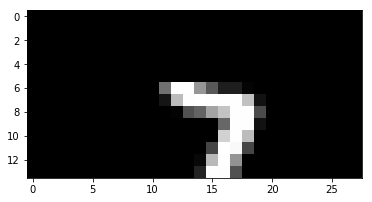

In [0]:
test_imgs,_=get_batch(test_imgs.reshape(-1,28,28),test_labels)
init_imgs=test_imgs[0,:14,:]
result_imgs=init_imgs.copy()
print(result_imgs.shape)
plt.imshow(init_imgs.reshape(14,28),'gray')
init_imgs=init_imgs.reshape(-1,14,28)
for i in range(14):
  out=sess.run(pred,feed_dict={x:init_imgs.reshape(-1,14,28)})
  init_imgs=np.delete(init_imgs,0,axis=1)
  print(init_imgs.shape,out.shape)
  init_imgs=np.vstack([init_imgs[0],out]).reshape(-1,14,28)
  result_imgs=np.vstack([result_imgs,out])
  

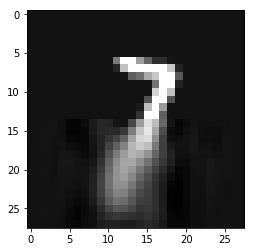

In [0]:
plt.imshow(result_imgs,'gray')